<h1 align='center' style='color:blue'>Projet Modélisation Credit Risque</h1>

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))
np.set_printoptions(suppress=True)

### Importation des données

In [19]:
df_customers = pd.read_csv("customers.csv")
df_loans = pd.read_csv("loans.csv")
df_bureau = pd.read_csv("bureau_data.csv")

In [20]:
df_customers.shape, df_loans.shape, df_bureau.shape

((50000, 12), (50000, 15), (50000, 8))

In [21]:
df_customers.head(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,Delhi,110001
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,Tamil Nadu,600001
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,West Bengal,700001


In [22]:
df_customers.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode'],
      dtype='object')

In [23]:
df_loans.head(3)

,loan_id,cust_id,loan_purpose,loan_type,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,L00001,C00001,Auto,Secured,3004000,2467000,49340.00,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,L00002,C00002,Home,Secured,4161000,3883000,77660.00,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,L00003,C00003,Personal,Unsecured,2401000,2170000,43400.00,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False


In [24]:
df_loans.columns

Index(['loan_id', 'cust_id', 'loan_purpose', 'loan_type', 'sanction_amount',
       'loan_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'disbursal_date', 'installment_start_dt',
       'default'],
      dtype='object')

In [25]:
df_bureau.head(3)

,cust_id,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,1,1,42,0,0,3,7
1,C00002,3,1,96,12,60,5,4
2,C00003,2,1,82,24,147,6,58


In [26]:
df_bureau.columns

Index(['cust_id', 'number_of_open_accounts', 'number_of_closed_accounts',
       'total_loan_months', 'delinquent_months', 'total_dpd', 'enquiry_count',
       'credit_utilization_ratio'],
      dtype='object')

In [27]:
conversion_rate = 0.011 

In [28]:
df_customers['income'] = df_customers['income'] * conversion_rate

In [29]:
columns_to_convert = ['sanction_amount', 'loan_amount', 'processing_fee', 
                      'gst', 'net_disbursement', 'principal_outstanding', 
                      'bank_balance_at_application']

In [30]:
for col in columns_to_convert:
    df_loans[col] = df_loans[col] * conversion_rate

In [31]:
df = pd.merge(df_customers, df_loans, on='cust_id')
df.head(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,C00001,44,M,Married,Self-Employed,28446.00,3,Owned,27,Delhi,...,27137.00,542.74,4884.66,21709.60,33,17934.49,9607.25,2019-07-24,2019-08-10,False
1,C00002,38,M,Married,Salaried,13266.00,3,Owned,4,Chennai,...,42713.00,854.26,7688.34,34170.40,30,7802.40,5105.10,2019-07-24,2019-08-15,False
2,C00003,46,F,Married,Self-Employed,31658.00,3,Owned,24,Kolkata,...,23870.00,477.40,4296.60,19096.00,21,17186.39,16236.46,2019-07-24,2019-08-21,False


In [32]:
df = pd.merge(df, df_bureau, on='cust_id')
df.head(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,default,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,44,M,Married,Self-Employed,28446.00,3,Owned,27,Delhi,...,2019-07-24,2019-08-10,False,1,1,42,0,0,3,7
1,C00002,38,M,Married,Salaried,13266.00,3,Owned,4,Chennai,...,2019-07-24,2019-08-15,False,3,1,96,12,60,5,4
2,C00003,46,F,Married,Self-Employed,31658.00,3,Owned,24,Kolkata,...,2019-07-24,2019-08-21,False,2,1,82,24,147,6,58


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cust_id                      50000 non-null  object 
 1   age                          50000 non-null  int64  
 2   gender                       50000 non-null  object 
 3   marital_status               50000 non-null  object 
 4   employment_status            50000 non-null  object 
 5   income                       50000 non-null  float64
 6   number_of_dependants         50000 non-null  int64  
 7   residence_type               49938 non-null  object 
 8   years_at_current_address     50000 non-null  int64  
 9   city                         50000 non-null  object 
 10  state                        50000 non-null  object 
 11  zipcode                      50000 non-null  int64  
 12  loan_id                      50000 non-null  object 
 13  loan_purpose    

In [34]:
df['default'] = df['default'].astype(int)
df.default.value_counts()

default
0    45703
1     4297
Name: count, dtype: int64

Le défaut est une variable cible et nous pouvons constater un certain déséquilibre entre les classes.

### Train Test split

Nous effectuons un train test split avant de procéder à l'EDA afin d'éviter les fuites de données. Nous ne voulons pas que l'ensemble de test (qui fait partie de l'ensemble des données) influence l'EDA ou toute décision relative à l'ingénierie des caractéristiques. 

In [35]:
X = df.drop("default", axis="columns")
y = df['default']

X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.25,random_state=42)

df_train = pd.concat([X_train, y_train], axis="columns")
df_test = pd.concat([X_test, y_test], axis="columns")

df_train.head(2)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
12746,C12747,59,M,Married,Self-Employed,124597.00,3,Owned,30,Hyderabad,...,2020-10-31,2020-11-11,4,2,152,20,118,4,36,0
32495,C32496,44,F,Single,Salaried,7865.00,0,Owned,27,Mumbai,...,2022-10-22,2022-10-27,3,1,160,10,62,5,5,0


<h3 align="center" style="color:blue">Nettoyage des données</h3>

### Gestion des valeurs manquantes et des doublons

In [36]:
df_train.shape

(37500, 33)

In [37]:
df_train.isna().sum()

cust_id                         0
age                             0
gender                          0
marital_status                  0
employment_status               0
income                          0
number_of_dependants            0
residence_type                 47
years_at_current_address        0
city                            0
state                           0
zipcode                         0
loan_id                         0
loan_purpose                    0
loan_type                       0
sanction_amount                 0
loan_amount                     0
processing_fee                  0
gst                             0
net_disbursement                0
loan_tenure_months              0
principal_outstanding           0
bank_balance_at_application     0
disbursal_date                  0
installment_start_dt            0
number_of_open_accounts         0
number_of_closed_accounts       0
total_loan_months               0
delinquent_months               0
total_dpd     

In [38]:
df_train.residence_type.unique()

array(['Owned', 'Mortgage', 'Rented', nan], dtype=object)

In [39]:
mode_residence = df_train.residence_type.mode()[0]
mode_residence

'Owned'

In [42]:
df_train.residence_type.fillna(mode_residence, inplace=True)
df_test.residence_type.fillna(mode_residence, inplace=True)

df_train.residence_type.unique(), df_test.residence_type.unique()

(array(['Owned', 'Mortgage', 'Rented'], dtype=object),
 array(['Owned', 'Mortgage', 'Rented'], dtype=object))

In [43]:
df_train.duplicated().sum()

np.int64(0)

In [44]:
df_train.describe()

,age,income,number_of_dependants,years_at_current_address,zipcode,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,...,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
count,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,...,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00
mean,39.54,28966.59,1.94,16.00,418866.25,51696.61,43956.75,883.20,7912.21,35165.40,...,14672.01,10849.29,2.50,1.00,76.11,4.84,26.67,5.01,43.42,0.09
std,9.86,28861.59,1.54,8.92,169035.02,68836.16,59090.49,1244.41,10636.29,47272.39,...,13350.42,11474.60,1.12,0.81,43.77,5.84,32.78,2.03,29.39,0.28
min,18.00,0.00,0.00,1.00,110001.00,0.00,0.00,0.00,0.00,0.00,...,-0.01,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00
25%,33.00,8822.00,0.00,8.00,302001.00,12562.00,10571.00,211.42,1902.78,8456.80,...,4644.17,3157.44,1.00,0.00,42.00,0.00,0.00,4.00,18.00,0.00
50%,39.00,20735.00,2.00,16.00,400001.00,29084.00,24530.00,490.60,4415.40,19624.00,...,10971.70,7315.16,3.00,1.00,71.00,3.00,13.00,5.00,39.00,0.00
75%,46.00,36588.75,3.00,24.00,560001.00,56958.00,50809.00,1016.62,9145.62,40647.20,...,19633.67,13574.69,4.00,2.00,107.00,8.00,46.00,6.00,67.00,0.00
max,70.00,131989.00,5.00,31.00,700001.00,573925.00,526009.00,58228.98,94681.62,420807.20,...,55000.00,86313.07,4.00,2.00,223.00,24.00,171.00,9.00,99.00,1.00


In [45]:
df_train.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default'],
      dtype='object')

In [46]:
columns_continuous = ['age', 'income', 'number_of_dependants', 'years_at_current_address', 
                      'sanction_amount', 'loan_amount', 'processing_fee', 'gst', 'net_disbursement', 
                      'loan_tenure_months','principal_outstanding', 'bank_balance_at_application',
                      'number_of_open_accounts','number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
                       'total_dpd', 'enquiry_count', 'credit_utilization_ratio']

columns_categorical = ['gender', 'marital_status', 'employment_status', 'residence_type', 'city', 
                       'state', 'zipcode', 'loan_purpose', 'loan_type', 'default']

### Box plot pour visualiser les valeurs aberrantes

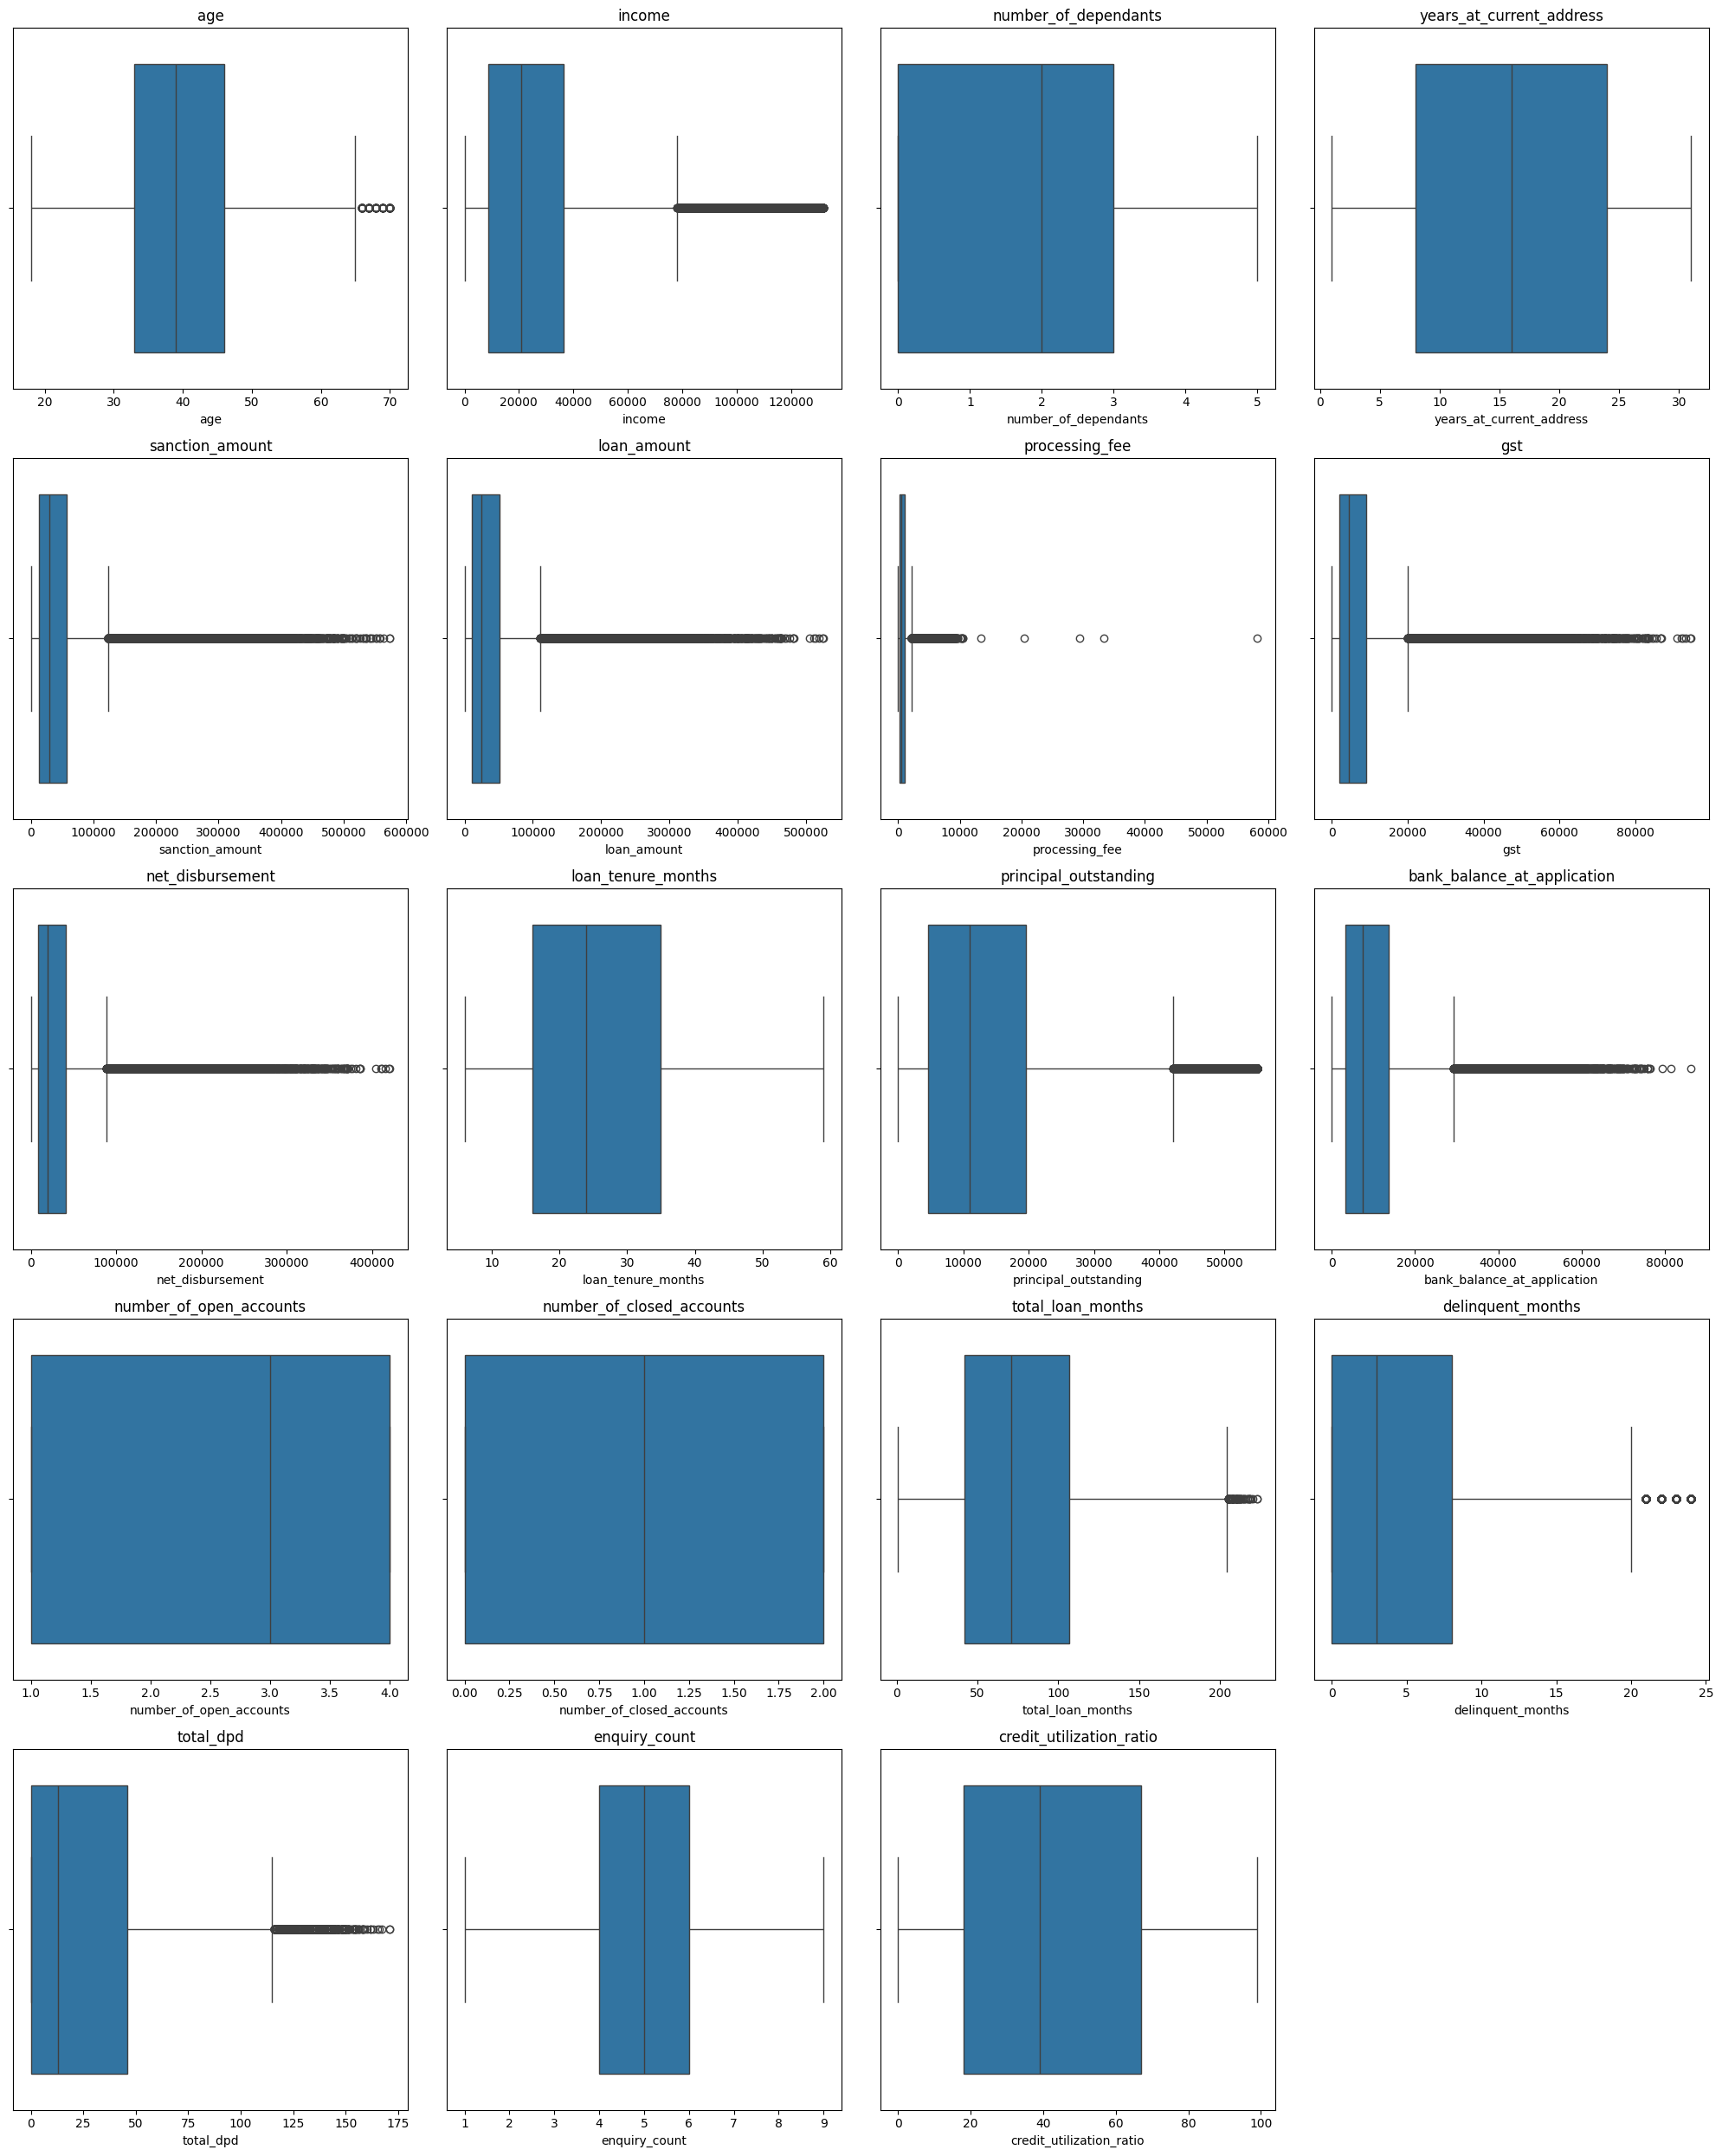

In [47]:
num_plots = len(columns_continuous)
num_cols = 4  # Number of plots per row
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))  # Adjust the figure size as needed
axes = axes.flatten()  # Flatten the axes array for easier indexing

for i, col in enumerate(columns_continuous):
    sns.boxplot(x=df_train[col], ax=axes[i])
    axes[i].set_title(col)  # Set the title to the name of the variable

# If there are any empty plots (if the number of plots isn't a perfect multiple of num_cols), hide the axes
for j in range(i + 1, num_rows * num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

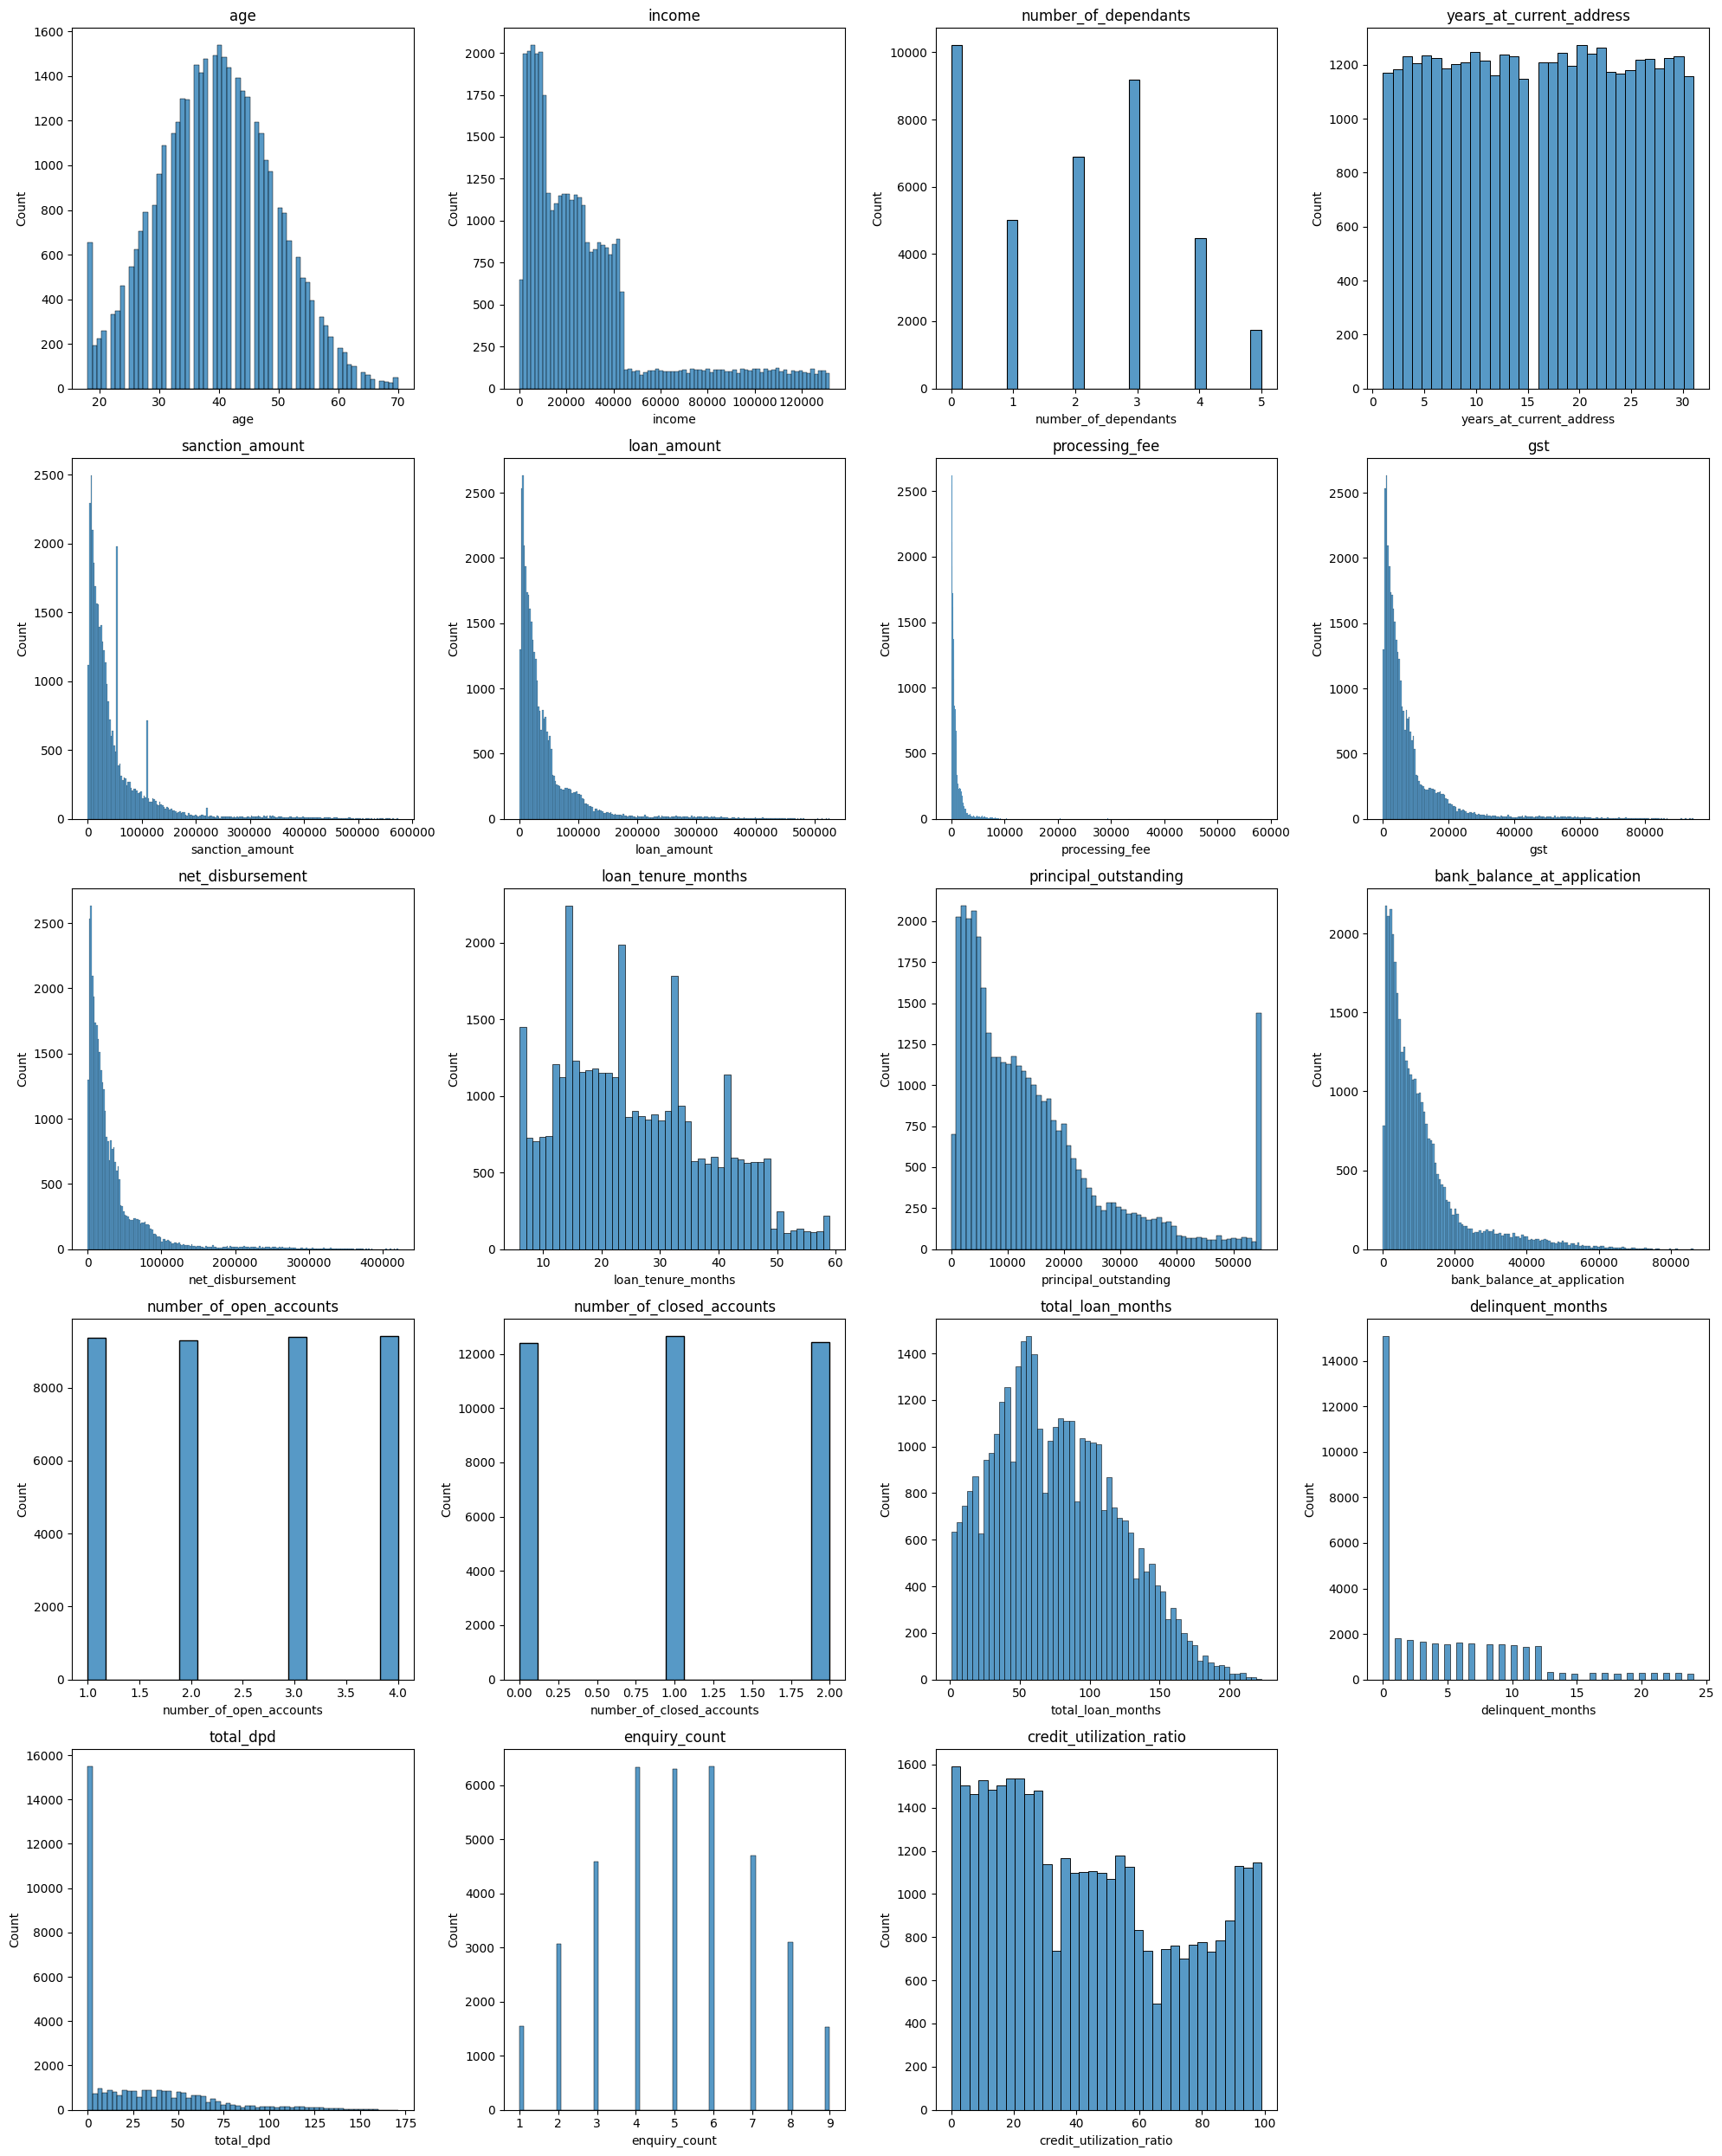

In [48]:
num_plots = len(columns_continuous)
num_cols = 4  # Number of plots per row
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))  # Adjust the figure size as needed
axes = axes.flatten()  # Flatten the axes array for easier indexing

for i, col in enumerate(columns_continuous):
    sns.histplot(df_train[col], ax=axes[i])
    axes[i].set_title(col)  # Set the title to the name of the variable

# If there are any empty plots (if the number of plots isn't a perfect multiple of num_cols), hide the axes
for j in range(i + 1, num_rows * num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

### Suppression des valeurs manquantes : Processing Fee

In [49]:
df_train.processing_fee.describe()

count   37500.00
mean      883.20
std      1244.41
min         0.00
25%       211.42
50%       490.60
75%      1016.62
max     58228.98
Name: processing_fee, dtype: float64

In [50]:
df_train[(df_train.processing_fee/df_train.loan_amount)>0.03][["loan_amount","processing_fee"]]

,loan_amount,processing_fee
23981,24574.00,29367.70
28174,10626.00,13359.42
47089,19118.00,20448.61
29305,28776.00,33400.16
9898,39886.00,58228.98


In [51]:
df_train_1 = df_train[df_train.processing_fee/df_train.loan_amount<0.03].copy()
df_train_1.shape

(37488, 33)

In [52]:
df_test.residence_type.isna().sum()

np.int64(0)

In [53]:
# Apply same step on test set
df_test = df_test[df_test.processing_fee/df_test.loan_amount<0.03].copy()
df_test.shape

(12497, 33)

In [54]:
# Utiliser d'autres règles de gestion pour la validation des données
# Règle 1 : la GST ne doit pas être supérieure à 20%.

df_train_1[(df_train_1.gst/df_train_1.loan_amount)>0.2].shape

(0, 33)

In [55]:
# Règle 2 : Le décaissement net ne doit pas être supérieur au montant du prêt.
df_train_1[df_train_1.net_disbursement>df_train_1.loan_amount].shape

(0, 33)

Aucune ligne n'a été trouvée qui enfreint les règles 1 et 2.

### Analyse des colonnes catégorielles

In [56]:
columns_categorical

['gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'city',
 'state',
 'zipcode',
 'loan_purpose',
 'loan_type',
 'default']

In [57]:
for col in columns_categorical:
    print(col, "-->", df_train_1[col].unique())

gender --> ['M' 'F']
marital_status --> ['Married' 'Single']
employment_status --> ['Self-Employed' 'Salaried']
residence_type --> ['Owned' 'Mortgage' 'Rented']
city --> ['Hyderabad' 'Mumbai' 'Chennai' 'Bangalore' 'Pune' 'Kolkata' 'Ahmedabad'
 'Delhi' 'Lucknow' 'Jaipur']
state --> ['Telangana' 'Maharashtra' 'Tamil Nadu' 'Karnataka' 'West Bengal'
 'Gujarat' 'Delhi' 'Uttar Pradesh' 'Rajasthan']
zipcode --> [500001 400001 600001 560001 411001 700001 380001 110001 226001 302001]
loan_purpose --> ['Home' 'Education' 'Personal' 'Auto' 'Personaal']
loan_type --> ['Secured' 'Unsecured']
default --> [0 1]


### Gestion des erreurs dans la colonne Loan Purpose

In [58]:
df_train_1['loan_purpose'] = df_train_1['loan_purpose'].replace('Personaal', 'Personal')
df_train_1['loan_purpose'].unique()

array(['Home', 'Education', 'Personal', 'Auto'], dtype=object)

In [59]:
df_test['loan_purpose'] = df_test['loan_purpose'].replace('Personaal', 'Personal')
df_test['loan_purpose'].unique()

array(['Home', 'Education', 'Auto', 'Personal'], dtype=object)

<h3 style="color:blue" align="center">Analyse exploratoire des données</h3>

In [60]:
columns_continuous

['age',
 'income',
 'number_of_dependants',
 'years_at_current_address',
 'sanction_amount',
 'loan_amount',
 'processing_fee',
 'gst',
 'net_disbursement',
 'loan_tenure_months',
 'principal_outstanding',
 'bank_balance_at_application',
 'number_of_open_accounts',
 'number_of_closed_accounts',
 'total_loan_months',
 'delinquent_months',
 'total_dpd',
 'enquiry_count',
 'credit_utilization_ratio']

### Colonne Age

In [61]:
df_train_1.groupby("default")['age'].describe()

,count,mean,std,min,25%,50%,75%,max
default,,,,,,,,
0,34265.00,39.77,9.88,18.00,33.00,40.00,46.00,70.00
1,3223.00,37.12,9.29,18.00,31.00,37.00,44.00,70.00


**aperçus**

1. L'âge moyen dans le groupe des défaillants est légèrement inférieur (37,12) à l'âge moyen (39,7) du groupe qui n'a pas connu de défaillance.
1. La variabilité (écart-type) est en grande partie similaire dans les deux groupes.
1. Les deux groupes ont des âges minimum et maximum similaires

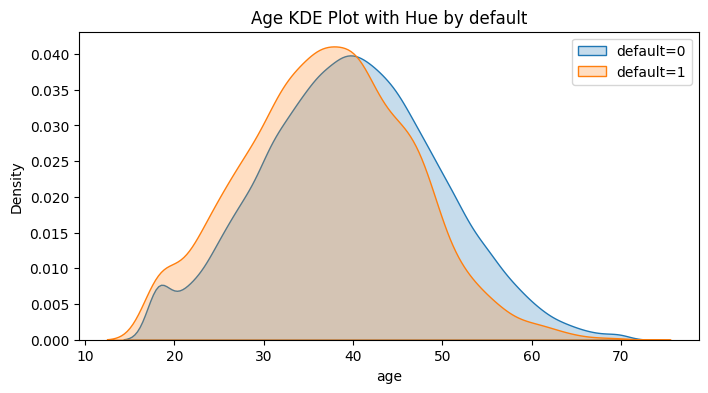

In [62]:
plt.figure(figsize=(8, 4))
sns.kdeplot(df_train_1['age'][df_train_1['default'] == 0], fill=True, label='default=0')
sns.kdeplot(df_train_1['age'][df_train_1['default'] == 1], fill=True, label='default=1')
plt.title(f"Age KDE Plot with Hue by default")
plt.legend()
plt.show()

**aperçus**

1. Le groupe orange (en défaut de paiement) est légèrement décalé vers la gauche, ce qui indique que les jeunes sont plus susceptibles de ne pas rembourser leurs prêts.

### KDE for all the Columns

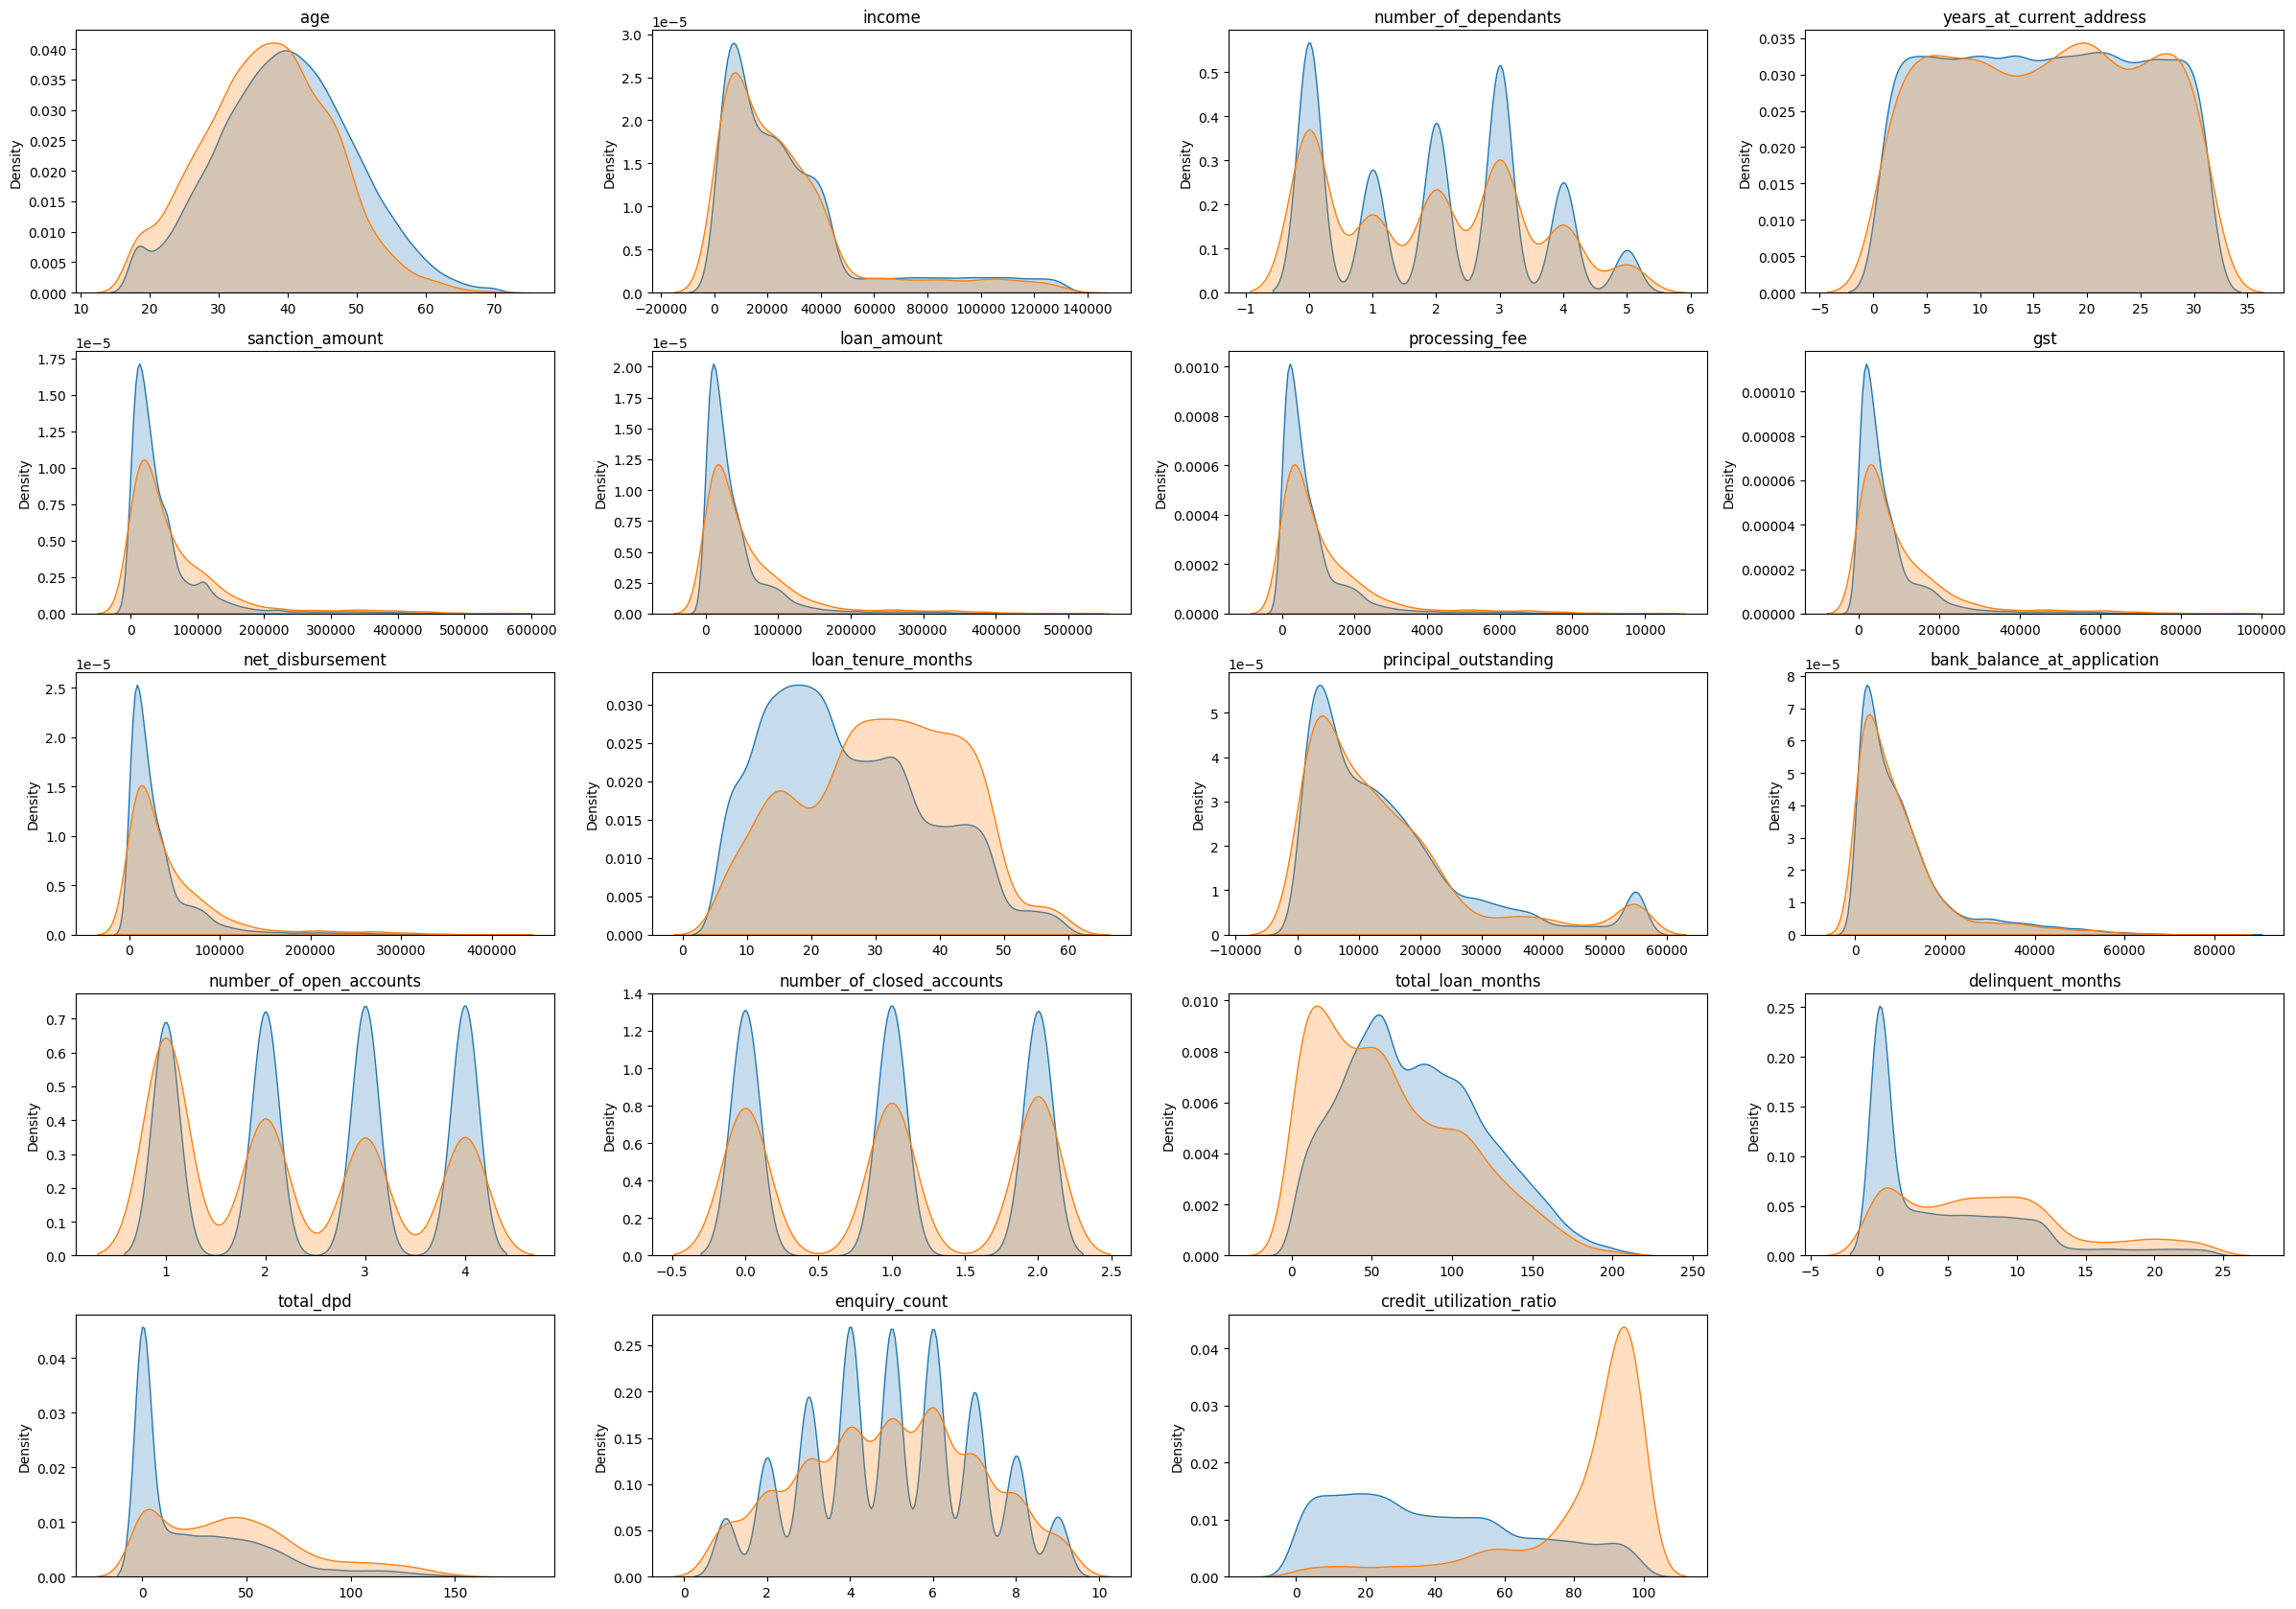

In [63]:
plt.figure(figsize=(24, 20))  # Width, height in inches

for i, col in enumerate(columns_continuous):
    plt.subplot(6, 4, i+1)  # 1 row, 4 columns, ith subplot
    sns.kdeplot(df_train_1[col][df_train_1['default']==0], fill=True, label='default=0')
    sns.kdeplot(df_train_1[col][df_train_1['default']==1], fill=True, label='default=1')
    plt.title(col)        
    plt.xlabel('')
    
plt.tight_layout()
plt.show()

**aperçus**

1. Dans les colonnes loan_tenure_months, delinquent_months, total_dpd, credit_utilization, des valeurs élevées indiquent une forte probabilité de défaut de paiement. Ces quatre variables semblent donc être de bons prédicteurs.
2. Pour les autres colonnes, les distributions ne révèlent aucun insight évident.
3. Pourquoi loan_amount et income ne montrent-ils aucun signe d’être de bons prédicteurs ? Peut-être qu’en les combinant pour obtenir le ratio prêt/revenu (LTI), on observera une influence sur la variable cible.

<h3 style="color:blue" align="center">Ingénierie des caractéristiques, sélection des caractéristiques</h3>

#### Générer un ratio prêt/revenu (PSR)

In [64]:
df_train_1[["loan_amount", "income"]].head(3)

,loan_amount,income
12746,257862.00,124597.00
32495,12639.00,7865.00
43675,124256.00,35145.00


In [65]:
df_train_1['loan_to_income'] = round(df_train_1['loan_amount'] / df_train_1['income'],2)
df_train_1['loan_to_income'].describe()

count   37488.00
mean        1.56
std         0.97
min         0.30
25%         0.77
50%         1.16
75%         2.46
max         4.57
Name: loan_to_income, dtype: float64

In [66]:
df_test['loan_to_income'] = round(df_test['loan_amount'] / df_test['income'],2)

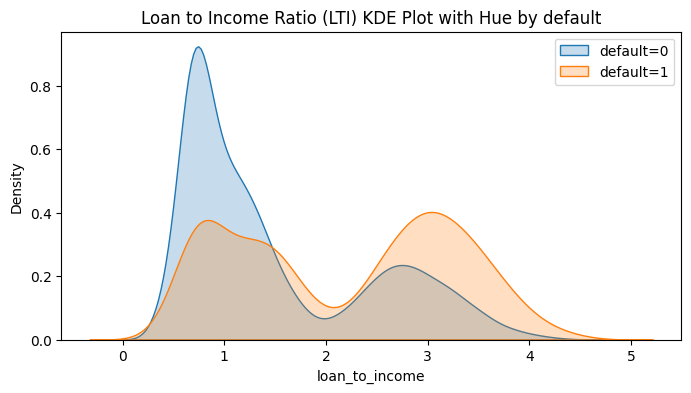

In [67]:
plt.figure(figsize=(8, 4))
sns.kdeplot(df_train_1['loan_to_income'][df_train_1['default'] == 0], fill=True, label='default=0')
sns.kdeplot(df_train_1['loan_to_income'][df_train_1['default'] == 1], fill=True, label='default=1')
plt.title(f"Loan to Income Ratio (LTI) KDE Plot with Hue by default")
plt.legend()
plt.show()

**aperçu**
1. Le graphique bleu présente la majorité de ses valeurs dans la partie inférieure du PSR.
2. Le graphique orange présente de nombreuses valeurs lorsque le PSR est plus élevé, ce qui indique qu'un PSR plus élevé est synonyme de prêt à haut risque.

#### Générer un taux d'impayés

In [68]:
df_train_1['delinquency_ratio'] = (df_train_1['delinquent_months']*100 / df_train_1['total_loan_months']).round(1)
df_test['delinquency_ratio'] = (df_test['delinquent_months']*100 / df_test['total_loan_months']).round(1)

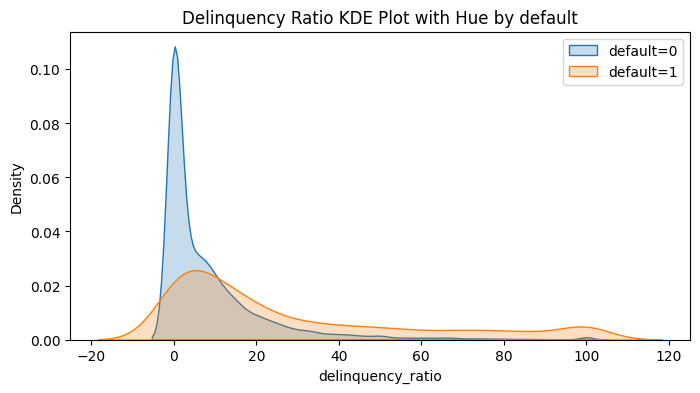

In [69]:
plt.figure(figsize=(8, 4))
sns.kdeplot(df_train_1['delinquency_ratio'][df_train_1['default'] == 0], fill=True, label='default=0')
sns.kdeplot(df_train_1['delinquency_ratio'][df_train_1['default'] == 1], fill=True, label='default=1')
plt.title(f"Delinquency Ratio KDE Plot with Hue by default")
plt.legend()
plt.show()

**aperçu**
1. Le graphique bleu présente la majorité de ses valeurs dans la partie inférieure du PSR.
2. Le graphique orange présente de nombreuses valeurs lorsque le taux de défaillance est plus élevé, ce qui indique une certaine corrélation avec la défaillance.

#### Générer une moyenne de DPD par délinquance

In [70]:
df_train_1['avg_dpd_per_delinquency'] = np.where(
    df_train_1['delinquent_months'] != 0,
    (df_train_1['total_dpd'] / df_train_1['delinquent_months']).round(1),
    0
)

df_test['avg_dpd_per_delinquency'] = np.where(
    df_test['delinquent_months'] != 0,
    (df_test['total_dpd'] / df_test['delinquent_months']).round(1),
    0
)

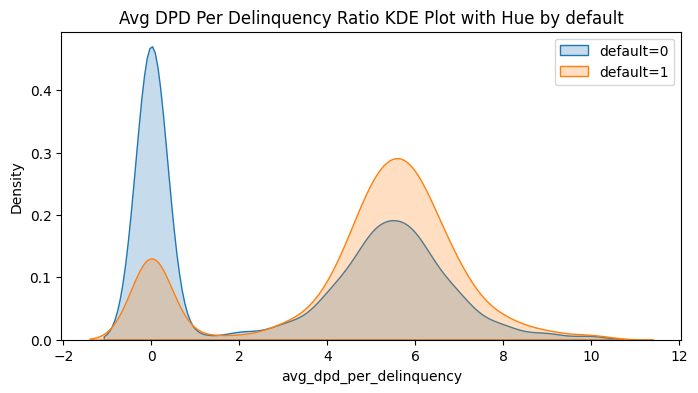

In [71]:
plt.figure(figsize=(8, 4))
sns.kdeplot(df_train_1['avg_dpd_per_delinquency'][df_train_1['default'] == 0], fill=True, label='default=0')
sns.kdeplot(df_train_1['avg_dpd_per_delinquency'][df_train_1['default'] == 1], fill=True, label='default=1')
plt.title(f"Avg DPD Per Delinquency Ratio KDE Plot with Hue by default")
plt.legend()
plt.show()

**aperçu**

1. Le graphique montre clairement qu'il y a plus de cas de défaillance lorsque avg_dpd_per_delinquency est élevé. Cela signifie que cette colonne est un facteur prédictif important

### Supprimer les colonnes qui ne sont que des identifiants uniques et qui n'ont pas d'influence sur la cible.

In [72]:
df_train_1.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default',
       'loan_to_income', 'delinquency_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

In [73]:
df_train_2 = df_train_1.drop(['cust_id', 'loan_id'],axis="columns")
df_test = df_test.drop(['cust_id', 'loan_id'],axis="columns")

In [74]:
df_train_3 = df_train_2.drop(['disbursal_date', 'installment_start_dt', 'loan_amount', 'income', 
                              'total_loan_months', 'delinquent_months', 'total_dpd'], axis="columns")
df_test = df_test.drop(['disbursal_date', 'installment_start_dt', 'loan_amount', 'income', 
                              'total_loan_months', 'delinquent_months', 'total_dpd'], axis="columns")
df_train_3.columns

Index(['age', 'gender', 'marital_status', 'employment_status',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'loan_purpose', 'loan_type',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

In [75]:
df_train_3.select_dtypes(['int64', 'float64']).columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

### VIF pour mésurer la multicolinéarité

In [76]:
X_train = df_train_3.drop('default', axis='columns')
y_train = df_train_3['default']

from sklearn.preprocessing import MinMaxScaler

cols_to_scale = X_train.select_dtypes(['int64', 'float64']).columns

scaler = MinMaxScaler()

X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_train.describe()

,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
count,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00
mean,0.41,0.39,0.50,0.52,0.09,0.08,0.08,0.08,0.38,0.26,0.12,0.50,0.50,0.50,0.44,0.29,0.10,0.33
std,0.19,0.31,0.30,0.29,0.12,0.11,0.11,0.11,0.23,0.24,0.13,0.37,0.41,0.25,0.30,0.23,0.17,0.29
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.29,0.00,0.23,0.33,0.02,0.02,0.02,0.02,0.19,0.08,0.03,0.00,0.00,0.38,0.18,0.11,0.00,0.00
50%,0.40,0.40,0.50,0.49,0.05,0.05,0.05,0.05,0.34,0.19,0.08,0.67,0.50,0.50,0.39,0.20,0.04,0.43
75%,0.54,0.60,0.77,0.76,0.10,0.10,0.10,0.10,0.55,0.35,0.16,1.00,1.00,0.62,0.68,0.51,0.13,0.57
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


#### Même transformation sur les ensembles de test

In [77]:
X_test = df_test.drop('default', axis='columns')
y_test = df_test['default']

X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])
X_test.describe()

,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
count,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00
mean,0.42,0.38,0.50,0.53,0.09,0.08,0.08,0.08,0.38,0.26,0.12,0.50,0.50,0.50,0.44,0.29,0.11,0.33
std,0.19,0.31,0.30,0.29,0.12,0.11,0.11,0.11,0.23,0.25,0.13,0.37,0.41,0.25,0.30,0.23,0.17,0.29
min,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.29,0.00,0.23,0.33,0.02,0.02,0.02,0.02,0.19,0.08,0.03,0.00,0.00,0.38,0.18,0.11,0.00,0.00
50%,0.42,0.40,0.50,0.51,0.05,0.05,0.05,0.05,0.34,0.20,0.08,0.33,0.50,0.50,0.39,0.20,0.04,0.44
75%,0.54,0.60,0.77,0.76,0.10,0.09,0.09,0.09,0.55,0.36,0.16,0.67,1.00,0.62,0.68,0.50,0.13,0.58
max,1.00,1.00,1.00,1.00,0.98,0.96,0.96,0.96,1.00,1.00,0.94,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [87]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [88]:
X_train.head(2)

,age,gender,marital_status,employment_status,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode,...,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
12746,0.79,M,Married,Self-Employed,0.60,Owned,0.97,Hyderabad,Telangana,0.66,...,0.42,1.00,0.61,1.00,1.00,0.38,0.36,0.41,0.13,0.59
32495,0.50,F,Single,Salaried,0.00,Owned,0.87,Mumbai,Maharashtra,0.49,...,0.83,0.09,0.03,0.67,0.50,0.50,0.05,0.31,0.06,0.62


In [89]:
calculate_vif(X_train[cols_to_scale])

/home/ludovic.bribaud/.local/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Column,VIF
0,age,5.70
1,number_of_dependants,2.73
2,years_at_current_address,3.42
3,zipcode,3.80
4,sanction_amount,101.09
5,processing_fee,inf
6,gst,inf
7,net_disbursement,inf
8,loan_tenure_months,6.18
9,principal_outstanding,16.33


In [90]:
features_to_drop_vif = ['sanction_amount', 'processing_fee', 'gst', 'net_disbursement','principal_outstanding']


X_train_1 = X_train.drop(features_to_drop_vif, axis='columns')
numeric_columns = X_train_1.select_dtypes(['int64', 'float64']).columns
numeric_columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [91]:
calculate_vif(X_train_1[numeric_columns])

,Column,VIF
0,age,5.43
1,number_of_dependants,2.73
2,years_at_current_address,3.40
3,zipcode,3.78
4,loan_tenure_months,6.02
5,bank_balance_at_application,1.80
6,number_of_open_accounts,4.35
7,number_of_closed_accounts,2.37
8,enquiry_count,6.38
9,credit_utilization_ratio,2.92


In [93]:
selected_numeric_features_vif = vif_df.Column.values
selected_numeric_features_vif

NameError: name 'vif_df' is not defined

In [94]:
numeric_columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [95]:
numeric_columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

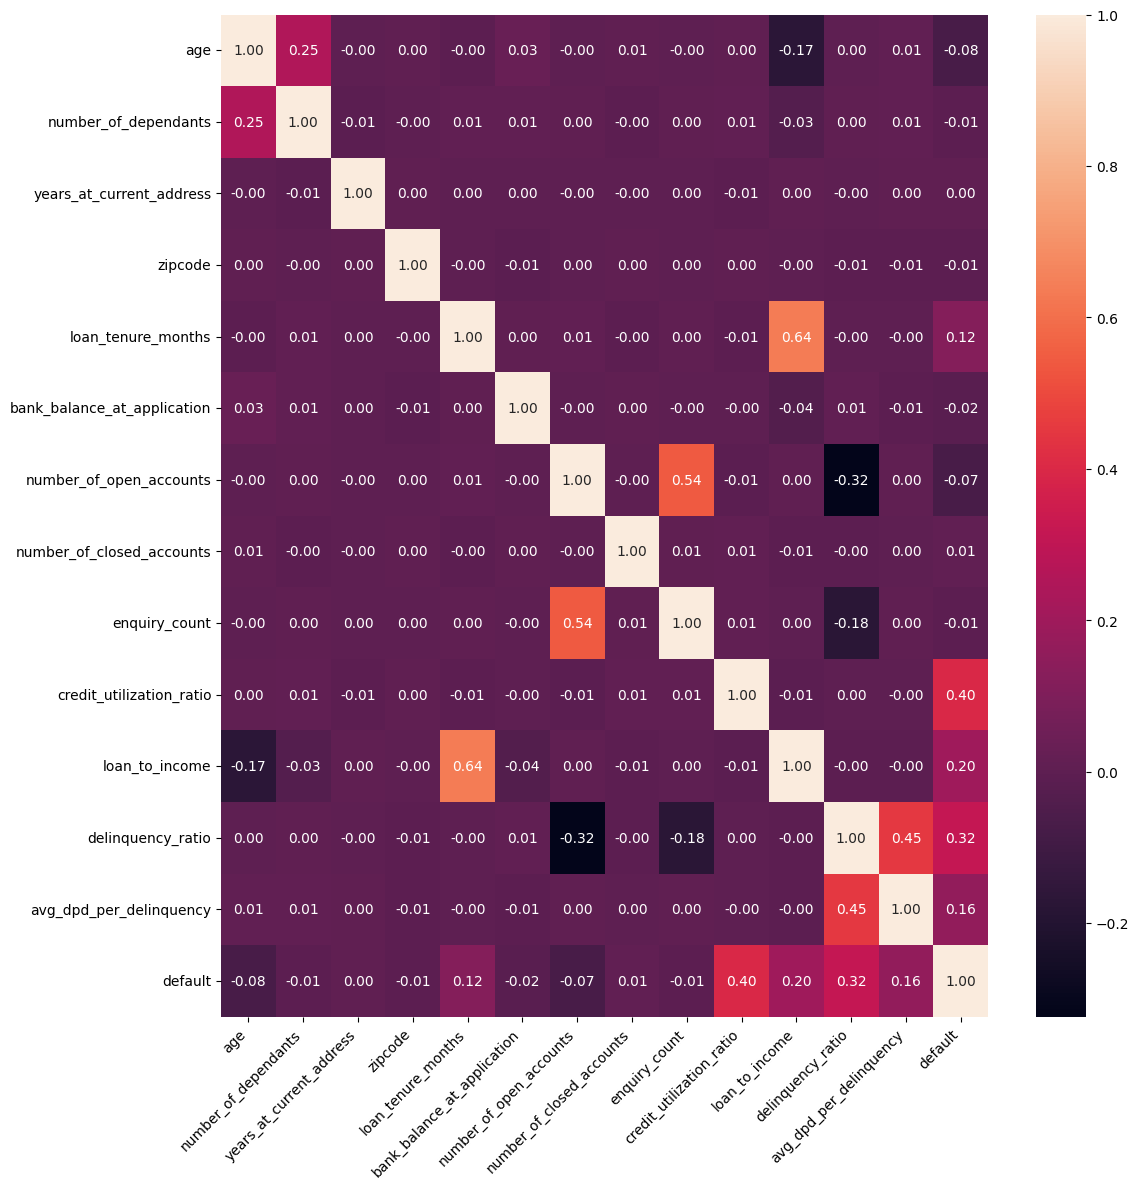

In [96]:
plt.figure(figsize=(12,12))
cm = df_train_3[numeric_columns.append(pd.Index(['default']))].corr()
sns.heatmap(cm, annot=True, fmt='0.2f')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### Sélection de caractéristiques : Caractéristiques catégorielles

In [97]:
X_train_1.head()

,age,gender,marital_status,employment_status,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode,...,loan_type,loan_tenure_months,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
12746,0.79,M,Married,Self-Employed,0.60,Owned,0.97,Hyderabad,Telangana,0.66,...,Secured,0.42,0.61,1.00,1.00,0.38,0.36,0.41,0.13,0.59
32495,0.50,F,Single,Salaried,0.00,Owned,0.87,Mumbai,Maharashtra,0.49,...,Secured,0.83,0.03,0.67,0.50,0.50,0.05,0.31,0.06,0.62
43675,0.38,M,Single,Salaried,0.00,Mortgage,0.83,Chennai,Tamil Nadu,0.83,...,Secured,0.49,0.17,0.00,0.50,0.38,0.00,0.76,0.22,0.56
9040,0.46,M,Married,Salaried,0.40,Mortgage,0.97,Bangalore,Karnataka,0.76,...,Secured,0.64,0.08,0.67,0.00,0.88,0.88,0.19,0.00,0.00
13077,0.77,M,Married,Self-Employed,0.80,Owned,0.93,Pune,Maharashtra,0.51,...,Unsecured,0.17,0.07,0.00,1.00,0.00,0.72,0.05,0.00,0.00


### Calcul du WOE et IV

In [98]:
def calculate_woe_iv(df, feature, target):
    grouped = df.groupby(feature)[target].agg(['count','sum'])
    grouped = grouped.rename(columns={'count': 'total', 'sum': 'good'})
    grouped['bad']=grouped['total']-grouped['good']
    
    total_good = grouped['good'].sum()
    total_bad = grouped['bad'].sum()
    
    grouped['good_pct'] = grouped['good'] / total_good
    grouped['bad_pct'] = grouped['bad'] / total_bad
    grouped['woe'] = np.log(grouped['good_pct']/ grouped['bad_pct'])
    grouped['iv'] = (grouped['good_pct'] -grouped['bad_pct'])*grouped['woe']
    
    grouped['woe'] = grouped['woe'].replace([np.inf, -np.inf], 0)
    grouped['iv'] = grouped['iv'].replace([np.inf, -np.inf], 0)
    
    total_iv = grouped['iv'].sum()
    
    return grouped, total_iv

grouped, total_iv = calculate_woe_iv(pd.concat([X_train_1, y_train],axis=1), 'loan_purpose', 'default')
grouped

,total,good,bad,good_pct,bad_pct,woe,iv
loan_purpose,,,,,,,
Auto,7447,327,7120,0.10,0.21,-0.72,0.08
Education,5620,559,5061,0.17,0.15,0.16,0.00
Home,11304,1734,9570,0.54,0.28,0.66,0.17
Personal,13117,603,12514,0.19,0.37,-0.67,0.12


In [99]:
X_train_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37488 entries, 12746 to 37784
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          37488 non-null  float64
 1   gender                       37488 non-null  object 
 2   marital_status               37488 non-null  object 
 3   employment_status            37488 non-null  object 
 4   number_of_dependants         37488 non-null  float64
 5   residence_type               37488 non-null  object 
 6   years_at_current_address     37488 non-null  float64
 7   city                         37488 non-null  object 
 8   state                        37488 non-null  object 
 9   zipcode                      37488 non-null  float64
 10  loan_purpose                 37488 non-null  object 
 11  loan_type                    37488 non-null  object 
 12  loan_tenure_months           37488 non-null  float64
 13  bank_balance_at_a

In [100]:
iv_values = {}

for feature in X_train_1.columns:
    if X_train_1[feature].dtype == 'object':
        _, iv = calculate_woe_iv(pd.concat([X_train_1, y_train],axis=1), feature, 'default' )
    else:
        X_binned = pd.cut(X_train_1[feature], bins=10, labels=False)
        _, iv = calculate_woe_iv(pd.concat([X_binned, y_train],axis=1), feature, 'default' )
    iv_values[feature] = iv
        
iv_values

{'age': np.float64(0.0890689462679479),
 'gender': np.float64(0.00047449502170914947),
 'marital_status': np.float64(0.001129766845390142),
 'employment_status': np.float64(0.003953046301722585),
 'number_of_dependants': np.float64(0.0019380899135053508),
 'residence_type': np.float64(0.246745268718145),
 'years_at_current_address': np.float64(0.0020800513608156363),
 'city': np.float64(0.0019059578709781529),
 'state': np.float64(0.0019005589806779287),
 'zipcode': np.float64(0.0016677413243392572),
 'loan_purpose': np.float64(0.3691197842282755),
 'loan_type': np.float64(0.16319324904149224),
 'loan_tenure_months': np.float64(0.21893515090196278),
 'bank_balance_at_application': np.float64(0.0063187993277516365),
 'number_of_open_accounts': np.float64(0.08463134083005877),
 'number_of_closed_accounts': np.float64(0.0011964272592421567),
 'enquiry_count': np.float64(0.007864214085342608),
 'credit_utilization_ratio': np.float64(2.352965568168245),
 'loan_to_income': np.float64(0.47641

In [101]:
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

iv_df = pd.DataFrame(list(iv_values.items()), columns=['Feature', 'IV'])
iv_df = iv_df.sort_values(by='IV', ascending=False)
iv_df

,Feature,IV
17,credit_utilization_ratio,2.353
19,delinquency_ratio,0.717
18,loan_to_income,0.476
20,avg_dpd_per_delinquency,0.402
10,loan_purpose,0.369
5,residence_type,0.247
12,loan_tenure_months,0.219
11,loan_type,0.163
0,age,0.089
14,number_of_open_accounts,0.085


In [102]:
# select features that has IV > 0.02
selected_features_iv = [feature for feature, iv in iv_values.items() if iv > 0.02]
selected_features_iv

['age',
 'residence_type',
 'loan_purpose',
 'loan_type',
 'loan_tenure_months',
 'number_of_open_accounts',
 'credit_utilization_ratio',
 'loan_to_income',
 'delinquency_ratio',
 'avg_dpd_per_delinquency']

### Encodage des caractéristiques

In [103]:
X_train_reduced = X_train_1[selected_features_iv]
X_test_reduced = X_test[selected_features_iv]

In [104]:
X_train_encoded = pd.get_dummies(X_train_reduced, drop_first=True)
X_train_encoded.head(3)

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
12746,0.788,0.415,1.000,0.364,0.415,0.132,0.590,True,False,False,True,False,False
32495,0.500,0.830,0.667,0.051,0.307,0.062,0.620,True,False,True,False,False,False
43675,0.385,0.491,0.000,0.000,0.759,0.222,0.560,False,False,False,True,False,False


In [105]:
X_test_encoded = pd.get_dummies(X_test_reduced, drop_first=True)
X_test_encoded.head(3)

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
19205,0.346,0.755,0.333,0.990,0.550,0.000,0.000,True,False,False,True,False,False
15514,0.481,0.226,1.000,0.323,0.220,0.000,0.000,True,False,True,False,False,False
30367,0.231,0.547,0.667,0.828,0.180,0.000,0.000,True,False,False,False,False,False


<h3 align="center" style="color:blue">Entrainement du modèle</h3>

### Tentative 1

1. Régression logistique, RandomForest et XGB
1. Pas de traitement du déséquilibre des classes

In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train_encoded, y_train)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11423
           1       0.85      0.72      0.78      1074

    accuracy                           0.96     12497
   macro avg       0.91      0.85      0.88     12497
weighted avg       0.96      0.96      0.96     12497



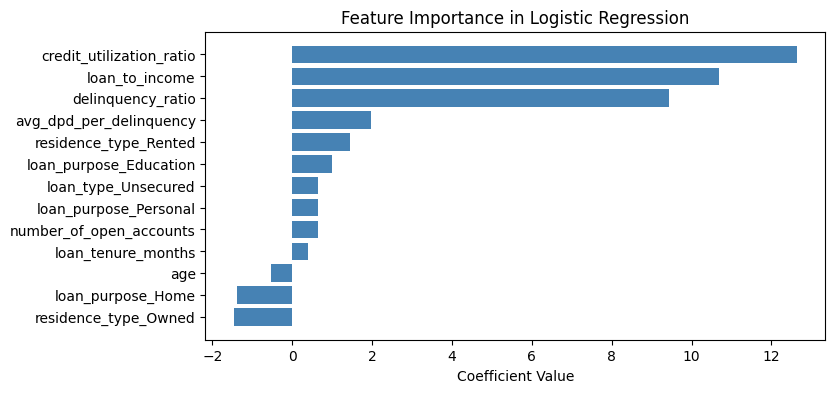

In [107]:
feature_importance = model.coef_[0]

# Create a DataFrame for easier handling
coef_df = pd.DataFrame(feature_importance, index=X_train_encoded.columns, columns=['Coefficients'])

# Sort the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Logistic Regression')
plt.show()

In [108]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train_encoded, y_train)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11423
           1       0.86      0.71      0.78      1074

    accuracy                           0.97     12497
   macro avg       0.92      0.85      0.88     12497
weighted avg       0.96      0.97      0.96     12497



In [111]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train_encoded, y_train)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11423
           1       0.82      0.76      0.79      1074

    accuracy                           0.96     12497
   macro avg       0.90      0.87      0.88     12497
weighted avg       0.96      0.96      0.96     12497



Comme il n'y a pas beaucoup de différence entre XGB et Logistic, nous choisirons LogisticRegression comme candidat pour notre candidat RandomizedSearchCV, car il a une meilleure interprétation.

#### RandomizedSearch CV pour tentative 1: Logistic Regression

In [113]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'C': np.logspace(-4, 4, 20),  # Logarithmically spaced values from 10^-4 to 10^4
    'solver': ['lbfgs', 'saga', 'liblinear', 'newton-cg']   # Algorithm to use in the optimization problem
}

# Create the Logistic Regression model
log_reg = LogisticRegression(max_iter=10000)  # Increased max_iter for convergence

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings that are sampled
    scoring='f1',
    cv=3,  # 5-fold cross-validation
    verbose=2,
    random_state=42,  # Set a random state for reproducibility
    n_jobs=-1  # Use all available cores
)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_train_encoded, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_encoded)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'solver': 'liblinear', 'C': np.float64(1438.44988828766)}
Best Score: 0.7578820896729832
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     11423
           1       0.83      0.74      0.78      1074

    accuracy                           0.96     12497
   macro avg       0.90      0.86      0.88     12497
weighted avg       0.96      0.96      0.96     12497



#### RandomizedSearch CV pour tentative 1: XGBoost

In [114]:
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV

# Define parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'scale_pos_weight': [1, 2, 3, 5, 7, 10],
    'reg_alpha': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0],  # L1 regularization term
    'reg_lambda': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0]  # L2 regularization term
}

xgb = XGBClassifier()

random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist, n_iter=100,
                                   scoring='f1', cv=3, verbose=1, n_jobs=-1, random_state=42)

random_search.fit(X_train_encoded, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_encoded)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters: {'subsample': 0.8, 'scale_pos_weight': 2, 'reg_lambda': 1.0, 'reg_alpha': 5.0, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.2, 'colsample_bytree': 0.9}
Best Score: 0.7879337792797508
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11423
           1       0.76      0.84      0.80      1074

    accuracy                           0.96     12497
   macro avg       0.87      0.91      0.89     12497
weighted avg       0.97      0.96      0.96     12497



### Tentative 2

1. Régression logistique et XGB
1. Traiter le déséquilibre des classes à l'aide d'un sous-échantillonnage

In [117]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = rus.fit_resample(X_train_encoded, y_train)
y_train_res.value_counts()

default
0    3223
1    3223
Name: count, dtype: int64

In [118]:
model = LogisticRegression()
model.fit(X_train_res, y_train_res)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     11423
           1       0.51      0.96      0.67      1074

    accuracy                           0.92     12497
   macro avg       0.75      0.93      0.81     12497
weighted avg       0.95      0.92      0.93     12497



In [119]:
model = XGBClassifier(**random_search.best_params_)
model.fit(X_train_res, y_train_res)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     11423
           1       0.51      0.99      0.67      1074

    accuracy                           0.92     12497
   macro avg       0.75      0.95      0.81     12497
weighted avg       0.96      0.92      0.93     12497



### Tentative 3

1. Régression logistique
1. Traiter le déséquilibre des classes à l'aide de SMOTE Tomek
1. Ajustement des paramètres avec optuna

In [120]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42)
X_train_smt, y_train_smt = smt.fit_resample(X_train_encoded, y_train)
y_train_smt.value_counts()

default
0    34195
1    34195
Name: count, dtype: int64

In [121]:
model = LogisticRegression()
model.fit(X_train_smt, y_train_smt)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11423
           1       0.55      0.94      0.70      1074

    accuracy                           0.93     12497
   macro avg       0.77      0.94      0.83     12497
weighted avg       0.96      0.93      0.94     12497



In [124]:
import optuna
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import cross_val_score

In [125]:
# Define the objective function for Optuna
def objective(trial):
    param = {
        'C': trial.suggest_float('C', 1e-4, 1e4, log=True),  # Logarithmically spaced values
        'solver': trial.suggest_categorical('solver', ['lbfgs', 'liblinear', 'saga', 'newton-cg']),  # Solvers
        'tol': trial.suggest_float('tol', 1e-6, 1e-1, log=True),  # Logarithmically spaced values for tolerance
        'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced'])  # Class weights
    }

    model = LogisticRegression(**param, max_iter=10000)
    
    # Calculate the cross-validated f1_score
    f1_scorer = make_scorer(f1_score, average='macro')
    scores = cross_val_score(model, X_train_smt, y_train_smt, cv=3, scoring=f1_scorer, n_jobs=-1)
    
    return np.mean(scores)

study_logistic = optuna.create_study(direction='maximize')
study_logistic.optimize(objective, n_trials=50)

[I 2025-02-17 18:41:49,518] A new study created in memory with name: no-name-1c4e468e-d4d3-4ae9-92cc-508c7f03ce24
[I 2025-02-17 18:41:50,782] Trial 0 finished with value: 0.9456794085990863 and parameters: {'C': 613.4881696998785, 'solver': 'saga', 'tol': 4.325993803436302e-06, 'class_weight': None}. Best is trial 0 with value: 0.9456794085990863.
[I 2025-02-17 18:41:51,022] Trial 1 finished with value: 0.8800321316621608 and parameters: {'C': 0.0010828074379976877, 'solver': 'liblinear', 'tol': 9.481101229743007e-05, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.9456794085990863.
[I 2025-02-17 18:41:51,347] Trial 2 finished with value: 0.9452667334976587 and parameters: {'C': 1.4897913030687435, 'solver': 'lbfgs', 'tol': 0.0008629547719672497, 'class_weight': None}. Best is trial 0 with value: 0.9456794085990863.
[I 2025-02-17 18:41:52,291] Trial 3 finished with value: 0.9458098891825619 and parameters: {'C': 3.802280729113584, 'solver': 'saga', 'tol': 5.36864400336249e-0

In [126]:
print('Best trial:')
trial = study_logistic.best_trial
print('  F1-score: {}'.format(trial.value))
print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))
    
best_model_logistic = LogisticRegression(**study_logistic.best_params)
best_model_logistic.fit(X_train_smt, y_train_smt)

# Evaluate on the test set
y_pred = best_model_logistic.predict(X_test_encoded)

report = classification_report(y_test, y_pred)
print(report)

Best trial:
  F1-score: 0.945838696734819
  Params: 
    C: 4.880077562917514
    solver: liblinear
    tol: 0.00020958769046856574
    class_weight: None
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11423
           1       0.56      0.94      0.70      1074

    accuracy                           0.93     12497
   macro avg       0.78      0.94      0.83     12497
weighted avg       0.96      0.93      0.94     12497



### Tentative 4

1. XGBoost
1. Gérer le déséquilibre des classes à l'aide de SMOTE Tomek
1. Réglage des paramètres avec optuna

In [127]:
# Define the objective function for Optuna
def objective(trial):
    param = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'verbosity': 0,
        'booster': 'gbtree',
        'lambda': trial.suggest_float('lambda', 1e-3, 10.0, log=True),
        'alpha': trial.suggest_float('alpha', 1e-3, 10.0, log=True),
        'subsample': trial.suggest_float('subsample', 0.4, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1.0),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'eta': trial.suggest_float('eta', 0.01, 0.3),
        'gamma': trial.suggest_float('gamma', 0, 10),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'max_delta_step': trial.suggest_int('max_delta_step', 0, 10)
    }

    model = XGBClassifier(**param)
    
    # Calculate the cross-validated f1_score
    f1_scorer = make_scorer(f1_score, average='macro')
    scores = cross_val_score(model, X_train_smt, y_train_smt, cv=3, scoring=f1_scorer, n_jobs=-1)
    
    return np.mean(scores)

study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective, n_trials=50)

[I 2025-02-17 18:42:47,536] A new study created in memory with name: no-name-ea175741-0c38-4f91-b325-aa1a3341b84d
[I 2025-02-17 18:42:48,552] Trial 0 finished with value: 0.9616078376579198 and parameters: {'lambda': 0.13734535116812305, 'alpha': 4.770891982089304, 'subsample': 0.922820277214749, 'colsample_bytree': 0.7484607836473307, 'max_depth': 4, 'eta': 0.14711124913304832, 'gamma': 9.601015798383347, 'scale_pos_weight': 1.9270047667310997, 'min_child_weight': 8, 'max_delta_step': 9}. Best is trial 0 with value: 0.9616078376579198.
[I 2025-02-17 18:42:49,457] Trial 1 finished with value: 0.912637352342653 and parameters: {'lambda': 1.776890860191073, 'alpha': 9.24366771749252, 'subsample': 0.7885203857235099, 'colsample_bytree': 0.4308568995540565, 'max_depth': 6, 'eta': 0.05225597607615125, 'gamma': 2.8204973162725597, 'scale_pos_weight': 6.0336143715334885, 'min_child_weight': 5, 'max_delta_step': 9}. Best is trial 0 with value: 0.9616078376579198.
[I 2025-02-17 18:42:50,397] Tr

[I 2024-07-24 17:50:35,499] Trial 38 finished with value: 0.9678741393570025 and parameters: {'lambda': 0.9976520900512768, 'alpha': 9.588367878066226, 'subsample': 0.9370325994727099, 'colsample_bytree': 0.8458403786460049, 'max_depth': 8, 'eta': 0.23703830104167334, 'gamma': 7.436097449057038, 'scale_pos_weight': 1.589949873720893, 'min_child_weight': 6, 'max_delta_step': 9}. Best is trial 22 with value: 0.9757213925486866.
[I 2024-07-24 17:50:36,304] Trial 39 finished with value: 0.9723537755942081 and parameters: {'lambda': 0.018929869665056154, 'alpha': 0.05977713969206375, 'subsample': 0.7575138892644601, 'colsample_bytree': 0.7521905892114831, 'max_depth': 7, 'eta': 0.20127460185620993, 'gamma': 1.6680128334253785, 'scale_pos_weight': 3.3162723303872665, 'min_child_weight': 2, 'max_delta_step': 6}. Best is trial 22 with value: 0.9757213925486866.
[I 2024-07-24 17:50:37,036] Trial 40 finished with value: 0.9614659851004902 and parameters: {'lambda': 0.4677438044466537, 'alpha': 0

In [128]:
print('Best trial:')
trial = study_xgb.best_trial
print('  F1-score: {}'.format(trial.value))
print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))
    
best_params = study_xgb.best_params
best_model_xgb = XGBClassifier(**best_params)
best_model_xgb.fit(X_train_smt, y_train_smt)

# Evaluate on the test set
y_pred = best_model_xgb.predict(X_test_encoded)

report = classification_report(y_test, y_pred)
print(report)

Best trial:
  F1-score: 0.9746545034413591
  Params: 
    lambda: 0.02566010286713012
    alpha: 0.4622362542072072
    subsample: 0.8442288911277906
    colsample_bytree: 0.8771772516486652
    max_depth: 8
    eta: 0.2580804402720963
    gamma: 0.046439997567934044
    scale_pos_weight: 1.5512947626911382
    min_child_weight: 10
    max_delta_step: 7
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     11423
           1       0.71      0.86      0.78      1074

    accuracy                           0.96     12497
   macro avg       0.85      0.91      0.88     12497
weighted avg       0.96      0.96      0.96     12497



## Evaluation du modèle : ROC/AUC

In [129]:
y_pred = best_model_logistic.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11423
           1       0.56      0.94      0.70      1074

    accuracy                           0.93     12497
   macro avg       0.78      0.94      0.83     12497
weighted avg       0.96      0.93      0.94     12497



In [130]:
from sklearn.metrics import roc_curve

probabilities = best_model_logistic.predict_proba(X_test_encoded)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, probabilities)

fpr[:5], tpr[:5], thresholds[:5]

(array([0.        , 0.        , 0.        , 0.00008754, 0.00008754]),
 array([0.        , 0.0009311 , 0.16014898, 0.16014898, 0.17690875]),
 array([       inf, 1.        , 0.99944513, 0.99943348, 0.99930529]))

In [131]:
from sklearn.metrics import auc

area = auc(fpr, tpr)
area

np.float64(0.9836734537509756)

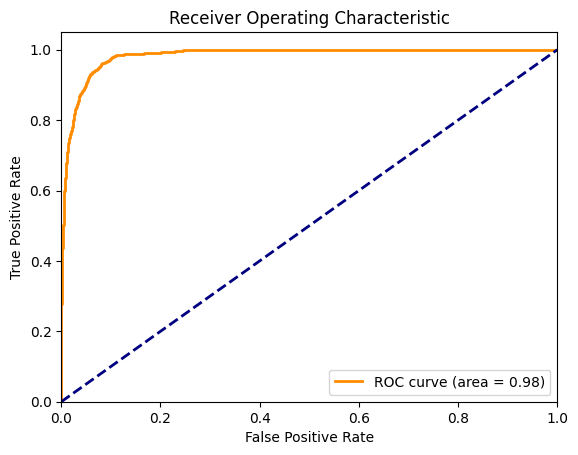

In [132]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Evaluation du modèle : Rankordering, KS statistic, Gini coeff

In [133]:
probabilities = best_model_logistic.predict_proba(X_test_encoded)[:,1]

df_eval = pd.DataFrame({
    'Default Truth': y_test,
    'Default Probability': probabilities
})
df_eval.head(3)

,Default Truth,Default Probability
19205,0,0.533
15514,0,0.000
30367,0,0.006


In [134]:
df_eval['Decile'] = pd.qcut(df_eval['Default Probability'], 10, labels=False, duplicates='drop')
df_eval.head(3)

,Default Truth,Default Probability,Decile
19205,0,0.533,8
15514,0,0.000,2
30367,0,0.006,6


In [135]:
df_eval[df_eval.Decile==8]['Default Probability'].describe()

count   1250.000
mean       0.486
std        0.182
min        0.215
25%        0.319
50%        0.469
75%        0.641
max        0.818
Name: Default Probability, dtype: float64

In [136]:
df_decile = df_eval.groupby('Decile').apply(lambda x: pd.Series({
    'Minimum Probability': x['Default Probability'].min(),
    'Maximum Probability': x['Default Probability'].max(),
    'Events': x['Default Truth'].sum(),
    'Non-events': x['Default Truth'].count() - x['Default Truth'].sum(),    
}))
df_decile.reset_index(inplace=True)
df_decile

/tmp/ipykernel_2996015/4037021561.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_decile = df_eval.groupby('Decile').apply(lambda x: pd.Series({


,Decile,Minimum Probability,Maximum Probability,Events,Non-events
0,0,0.000,0.000,0.000,1250.000
1,1,0.000,0.000,0.000,1250.000
2,2,0.000,0.000,0.000,1249.000
3,3,0.000,0.000,0.000,1250.000
4,4,0.000,0.001,0.000,1250.000
5,5,0.001,0.005,0.000,1249.000
6,6,0.005,0.030,5.000,1245.000
7,7,0.030,0.214,9.000,1240.000
8,8,0.215,0.818,161.000,1089.000
9,9,0.819,1.000,899.000,351.000


In [137]:
df_decile['Event Rate'] = df_decile['Events']*100 / (df_decile['Events']+df_decile['Non-events'])
df_decile['Non-event Rate'] = df_decile['Non-events']*100 / (df_decile['Events']+df_decile['Non-events'])
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate
0,0,0.000,0.000,0.000,1250.000,0.000,100.000
1,1,0.000,0.000,0.000,1250.000,0.000,100.000
2,2,0.000,0.000,0.000,1249.000,0.000,100.000
3,3,0.000,0.000,0.000,1250.000,0.000,100.000
4,4,0.000,0.001,0.000,1250.000,0.000,100.000
5,5,0.001,0.005,0.000,1249.000,0.000,100.000
6,6,0.005,0.030,5.000,1245.000,0.400,99.600
7,7,0.030,0.214,9.000,1240.000,0.721,99.279
8,8,0.215,0.818,161.000,1089.000,12.880,87.120
9,9,0.819,1.000,899.000,351.000,71.920,28.080


In [138]:
df_decile = df_decile.sort_values(by='Decile', ascending=False).reset_index(drop=True)
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate
0,9,0.819,1.000,899.000,351.000,71.920,28.080
1,8,0.215,0.818,161.000,1089.000,12.880,87.120
2,7,0.030,0.214,9.000,1240.000,0.721,99.279
3,6,0.005,0.030,5.000,1245.000,0.400,99.600
4,5,0.001,0.005,0.000,1249.000,0.000,100.000
5,4,0.000,0.001,0.000,1250.000,0.000,100.000
6,3,0.000,0.000,0.000,1250.000,0.000,100.000
7,2,0.000,0.000,0.000,1249.000,0.000,100.000
8,1,0.000,0.000,0.000,1250.000,0.000,100.000
9,0,0.000,0.000,0.000,1250.000,0.000,100.000


In [139]:
df_decile['Cum Events'] =  df_decile['Events'].cumsum()
df_decile['Cum Non-events'] =  df_decile['Non-events'].cumsum()
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events
0,9,0.819,1.000,899.000,351.000,71.920,28.080,899.000,351.000
1,8,0.215,0.818,161.000,1089.000,12.880,87.120,1060.000,1440.000
2,7,0.030,0.214,9.000,1240.000,0.721,99.279,1069.000,2680.000
3,6,0.005,0.030,5.000,1245.000,0.400,99.600,1074.000,3925.000
4,5,0.001,0.005,0.000,1249.000,0.000,100.000,1074.000,5174.000
5,4,0.000,0.001,0.000,1250.000,0.000,100.000,1074.000,6424.000
6,3,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,7674.000
7,2,0.000,0.000,0.000,1249.000,0.000,100.000,1074.000,8923.000
8,1,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,10173.000
9,0,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,11423.000


In [140]:
df_decile['Cum Event Rate'] = df_decile['Cum Events'] * 100 / df_decile['Events'].sum()
df_decile['Cum Non-event Rate'] = df_decile['Cum Non-events']*100 / df_decile['Non-events'].sum()
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events,Cum Event Rate,Cum Non-event Rate
0,9,0.819,1.000,899.000,351.000,71.920,28.080,899.000,351.000,83.706,3.073
1,8,0.215,0.818,161.000,1089.000,12.880,87.120,1060.000,1440.000,98.696,12.606
2,7,0.030,0.214,9.000,1240.000,0.721,99.279,1069.000,2680.000,99.534,23.461
3,6,0.005,0.030,5.000,1245.000,0.400,99.600,1074.000,3925.000,100.000,34.361
4,5,0.001,0.005,0.000,1249.000,0.000,100.000,1074.000,5174.000,100.000,45.295
5,4,0.000,0.001,0.000,1250.000,0.000,100.000,1074.000,6424.000,100.000,56.237
6,3,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,7674.000,100.000,67.180
7,2,0.000,0.000,0.000,1249.000,0.000,100.000,1074.000,8923.000,100.000,78.114
8,1,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,10173.000,100.000,89.057
9,0,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,11423.000,100.000,100.000


In [141]:
df_decile['KS'] = abs(df_decile['Cum Event Rate'] - df_decile['Cum Non-event Rate'])
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events,Cum Event Rate,Cum Non-event Rate,KS
0,9,0.819,1.000,899.000,351.000,71.920,28.080,899.000,351.000,83.706,3.073,80.633
1,8,0.215,0.818,161.000,1089.000,12.880,87.120,1060.000,1440.000,98.696,12.606,86.090
2,7,0.030,0.214,9.000,1240.000,0.721,99.279,1069.000,2680.000,99.534,23.461,76.073
3,6,0.005,0.030,5.000,1245.000,0.400,99.600,1074.000,3925.000,100.000,34.361,65.639
4,5,0.001,0.005,0.000,1249.000,0.000,100.000,1074.000,5174.000,100.000,45.295,54.705
5,4,0.000,0.001,0.000,1250.000,0.000,100.000,1074.000,6424.000,100.000,56.237,43.763
6,3,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,7674.000,100.000,67.180,32.820
7,2,0.000,0.000,0.000,1249.000,0.000,100.000,1074.000,8923.000,100.000,78.114,21.886
8,1,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,10173.000,100.000,89.057,10.943
9,0,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,11423.000,100.000,100.000,0.000


Pour déterminer si l'ordre des rangs est respecté, nous devons examiner si les déciles supérieurs (ceux dont les probabilités prédites sont les plus élevées) présentent des taux d'événements plus élevés que les déciles inférieurs. L'ordre de classement signifie qu'en passant du décile supérieur au décile inférieur, le taux d'événements devrait généralement diminuer.

Non-événements - qualifiés de bons (clients) qui ne font pas défaut. Événements - qualifiés de mauvais (clients) qui font défaut.

Les termes « événements » et « non-événements » sont interchangés en fonction des cas d'utilisation.

Par exemple : pour un cas d'utilisation marketing, les clients à contacter (qui accepteront un prêt sur la base des offres) seront des événements - ici, ils seront qualifiés de bons, et les clients qui n'accepteront pas de prêt seront des non-événements (mauvais).

**Instructions tirées de la table des déciles**

1. Les premiers déciles

* Le premier décile (décile 9) présente un taux d'événements élevé de 72,00 % et un taux de non-événements de 28,00 %. Cela indique que le modèle est très confiant dans la prédiction des événements dans ce décile.
* Le deuxième décile (décile 8) présente également un taux d'événements significatif de 12,72 %, avec un taux d'événements cumulé atteignant 98,6 %.

2. Déciles moyens :

* Les déciles 7 et 6 montrent une baisse significative des taux d'événements.

3. Déciles inférieurs :

* Les déciles 5 à 0 ne présentent aucun événement, toutes les prédictions étant des non-événements. Ces déciles ont collectivement un taux de non-événement de 100 %.

4. Statistique KS :

* La statistique KS, qui est la différence maximale entre les taux d'événements cumulés et les taux de non-événements cumulés, est la plus élevée dans le décile 8 avec une valeur de 85,98 %. Cela suggère que le modèle est le plus performant pour distinguer les événements des non-événements jusqu'à ce décile.

* La valeur KS diminue progressivement dans les déciles suivants, indiquant une diminution de la performance du modèle pour distinguer les événements des non-événements.

**Valeur KS**

La valeur KS la plus élevée est de 85,98 % et se situe au décile 8. Cela indique que la performance du modèle pour distinguer les événements des non-événements est la plus significative dans ce décile. (Si la valeur KS se situe dans les 3 premiers déciles et que le score est supérieur à 40, on considère qu'il s'agit d'un bon modèle prédictif).

In [142]:
gini_coefficient = 2 * area - 1

print("AUC:", area)
print("Gini Coefficient:", gini_coefficient)

AUC: 0.9836734537509756
Gini Coefficient: 0.9673469075019512


AUC de 0,98 : Le modèle fait très bien la distinction entre les événements et les non-événements.

Coefficient de Gini de 0,96 : Ce coefficient confirme que le modèle est très efficace dans ses prédictions, avec une capacité de classement presque parfaite.

Le coefficient de Gini est compris entre -1 et 1, une valeur proche de 1 signifiant un modèle parfait, 0 indiquant un modèle sans pouvoir discriminant et -1 signifiant un modèle parfaitement incorrect.

#### Finalisation du modèle et visualisation de l'importance des caractéristiques

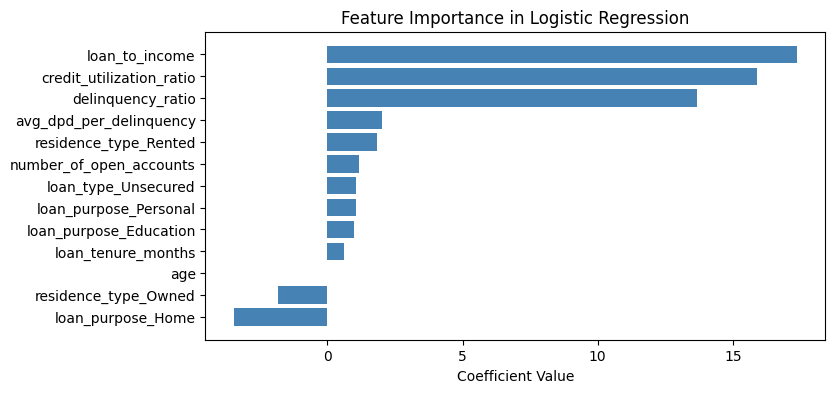

In [143]:
final_model = best_model_logistic

feature_importance = final_model.coef_[0]

# Create a DataFrame for easier handling
coef_df = pd.DataFrame(feature_importance, index=X_train_encoded.columns, columns=['Coefficients'])

# Sort the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Logistic Regression')
plt.show()

### Sauvegarde du modèle

In [144]:
X_test_encoded.head(2)

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
19205,0.346,0.755,0.333,0.990,0.550,0.000,0.000,True,False,False,True,False,False
15514,0.481,0.226,1.000,0.323,0.220,0.000,0.000,True,False,True,False,False,False


In [145]:
X_test_encoded.columns

Index(['age', 'loan_tenure_months', 'number_of_open_accounts',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency', 'residence_type_Owned',
       'residence_type_Rented', 'loan_purpose_Education', 'loan_purpose_Home',
       'loan_purpose_Personal', 'loan_type_Unsecured'],
      dtype='object')

In [146]:
cols_to_scale

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [147]:
X_train_encoded.columns

Index(['age', 'loan_tenure_months', 'number_of_open_accounts',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency', 'residence_type_Owned',
       'residence_type_Rented', 'loan_purpose_Education', 'loan_purpose_Home',
       'loan_purpose_Personal', 'loan_type_Unsecured'],
      dtype='object')

In [148]:
from joblib import dump

model_data = {
    'model': final_model,
    'features': X_train_encoded.columns,
    'scaler': scaler,
    'cols_to_scale': cols_to_scale
}
dump(model_data, 'model_data.joblib')

['model_data.joblib']

In [149]:
final_model.coef_, final_model.intercept_

(array([[-0.02313549,  0.6145773 ,  1.17138278, 15.88812695, 17.37878944,
         13.68397377,  2.03553119, -1.84009867,  1.83897362,  0.99664836,
         -3.46174859,  1.0491649 ,  1.0491649 ]]),
 array([-20.70521191]))

[CV] END ............C=0.08858667904100823, solver=newton-cg; total time=   0.4s
[CV] END ....................C=206.913808111479, solver=saga; total time=   0.6s
[CV] END ..................C=78.47599703514607, solver=lbfgs; total time=   0.2s
[CV] END ..............C=545.5594781168514, solver=liblinear; total time=   0.3s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.1s
[CV] END ...........C=0.012742749857031334, solver=liblinear; total time=   0.2s
[CV] END .................C=0.23357214690901212, solver=saga; total time=   0.5s
[CV] END ..............C=1.623776739188721, solver=liblinear; total time=   0.3s
[CV] END .............C=29.763514416313132, solver=liblinear; total time=   0.2s
[CV] END ...................C=545.5594781168514, solver=saga; total time=   0.5s
[CV] END .............C=0.00026366508987303583, solver=lbfgs; total time=   0.1s
[CV] END ..................C=545.5594781168514, solver=lbfgs; total time=   0.2s
[CV] END ...............C=20